<a href="https://colab.research.google.com/github/zevan07/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Oliver_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp

In [24]:
# check instances and column names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [113]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

df = pd.read_csv(url, header = None)

# verify correct number of instances
print(df.shape)

(690, 16)


In [0]:
# create names for columns
names = ['A' + str(x) for x in range(1, 17)]
df.columns = names
df.isnull().sum()

In [115]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
# replace '?' NA values 
df = df.replace('?', np.NaN)

In [117]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [118]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
# filled NA values with -1 to facillitate application of float dtype changes
df[['A2', 'A11', 'A14', 'A15']] = df[['A2', 'A11', 'A14', 'A15']].fillna(-1)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
df.A2 = df.A2.apply(float)
df.A11 = df.A11.apply(float)
df.A14 = df.A14.apply(float)
df.A15 = df.A15.apply(float)

In [0]:
# change back to NaN
df.A2.replace(float(-1), np.NaN, inplace = True)
df.A11.replace(-1, np.NaN, inplace = True)
df.A14.replace(-1, np.NaN, inplace = True)
df.A15.replace(float(-1), np.NaN, inplace = True)

In [0]:
df.A2.value_counts()

In [126]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [127]:
# null counts verified
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
pos = df[df['A16'] == '+']
neg = df[df['A16'] == '-']

In [129]:
pos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [130]:
neg.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


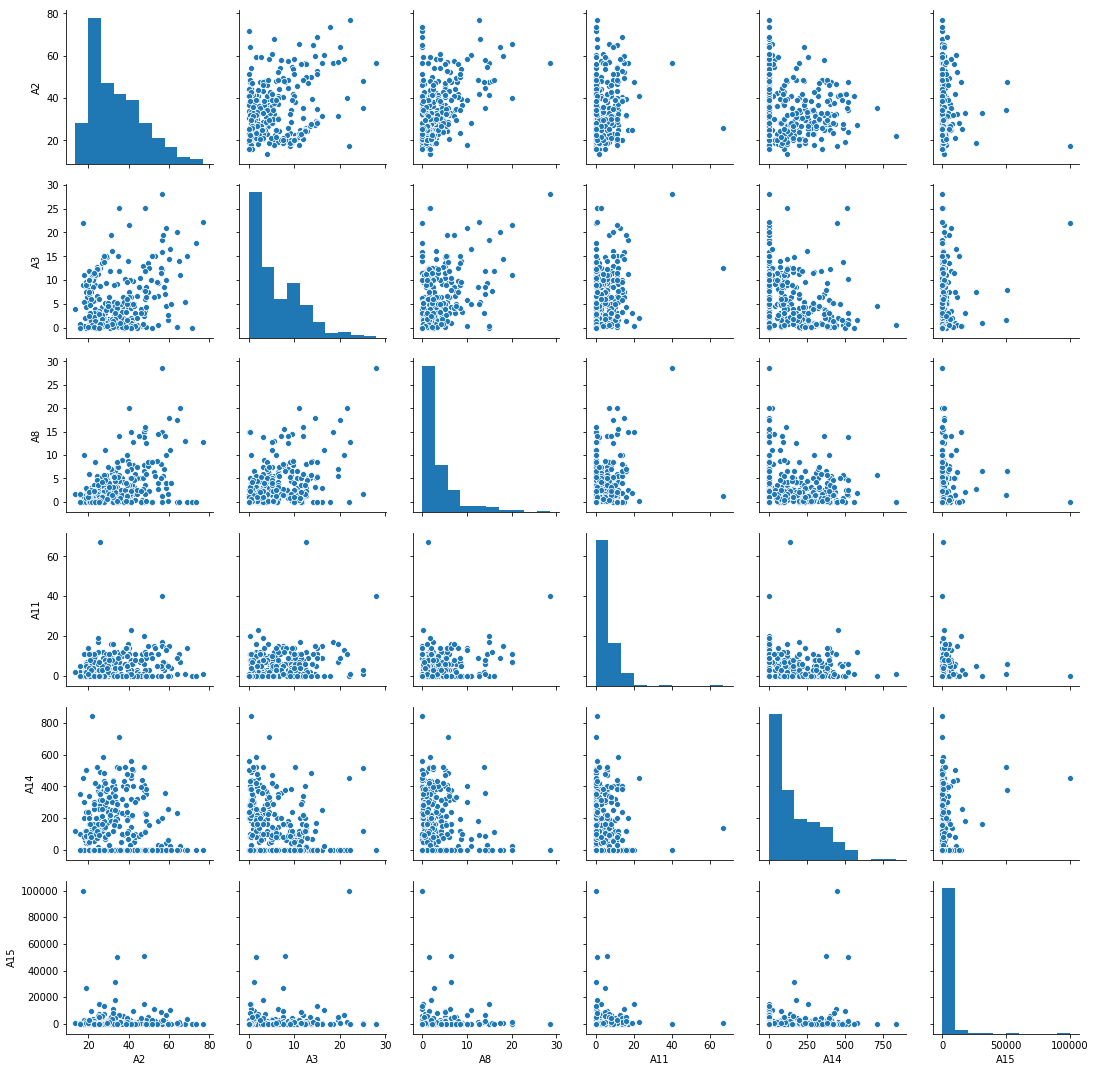

In [142]:
sns.pairplot(pos)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


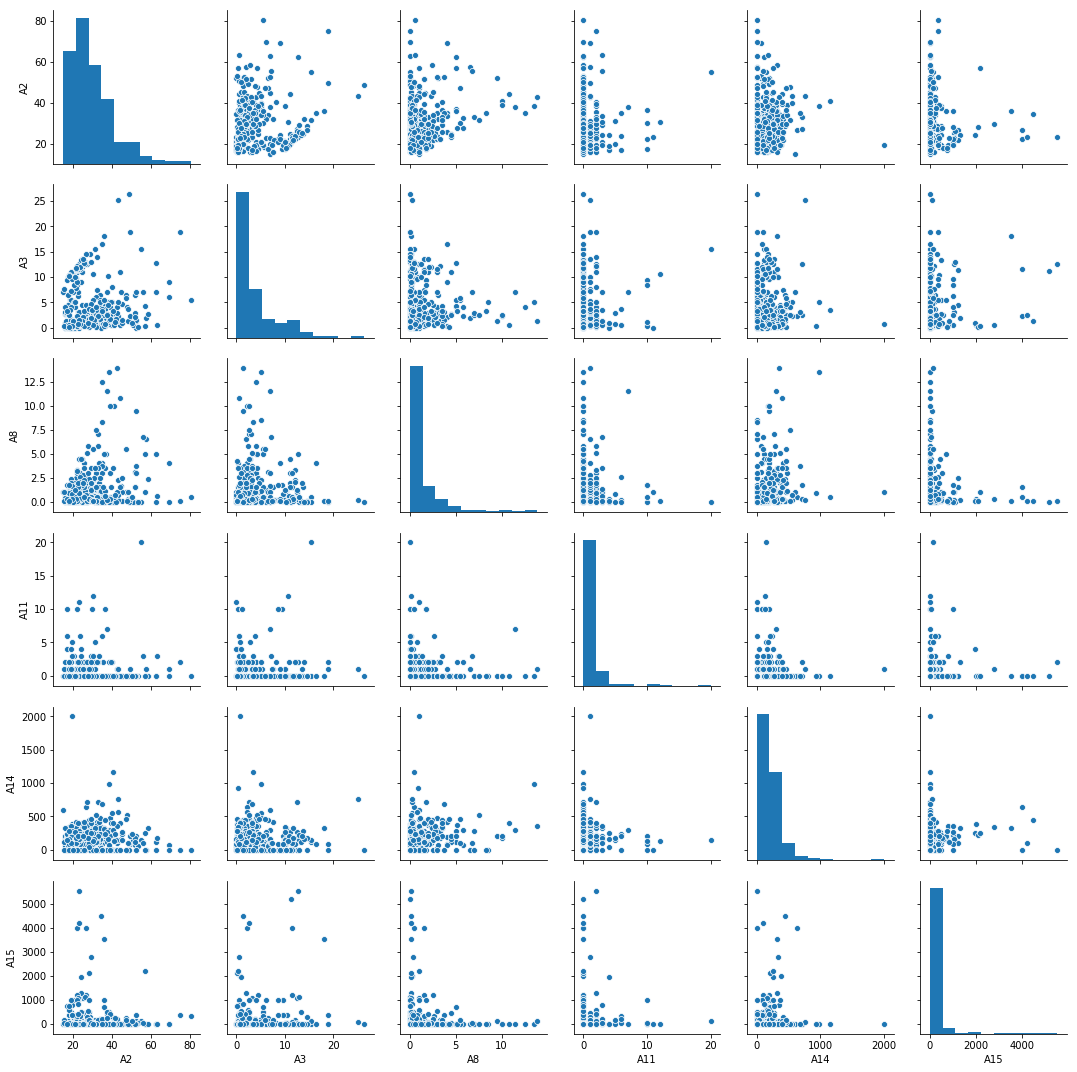

In [143]:
sns.pairplot(neg)

In [0]:
# create a function to get mean, confidence interval, and the interval (for use in graphing)
def confidence_interval(data, confidence = 0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return (mean, mean - interval, mean + interval, interval)

# create a reporter for all of the values calculated with the above function
def report_confidence_interval(confidence_interval):
    print('Mean: {}'.format(confidence_interval[0]))
    print('Lower bound: {}'.format(confidence_interval[1]))
    print('Upper bound: {}'.format(confidence_interval[2]))
    s = "our mean lies in the interval [{:.5}, {:.5}]".format(confidence_interval[1], confidence_interval[2])
    return s, confidence_interval[0]

In [0]:
def ttests(column):
    print('Negative mean:', round((neg[column].mean() * 100), 1))
    print('Positive mean:' , round((pos[column].mean() * 100), 1))
    print('Difference:', round((pos[column].mean() - neg[column].mean()) * 100, 1))
    print(ttest_ind(pos[column], neg[column], nan_policy='omit'))

In [186]:
for name in names:
    if df[name].dtype == float:
        print(name)
        ttests(name)
        print(' ')
# A11 is extremely different
# A14 is the least different

A2
Negative mean: 2980.8
Positive mean: 3372.0
Difference: 391.2
Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
 
A3
Negative mean: 384.0
Positive mean: 590.5
Difference: 206.5
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
 
A8
Negative mean: 125.8
Positive mean: 342.8
Difference: 217.0
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
 
A11
Negative mean: 63.2
Positive mean: 460.6
Difference: 397.4
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
 
A14
Negative mean: 19969.9
Positive mean: 16442.2
Difference: -3527.8
Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
 
A15
Negative mean: 19860.6
Positive mean: 203886.0
Difference: 184025.4
Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)
 


In [170]:
neg.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [184]:
for name in names:
    if df[name].dtype == object:
        display(pd.crosstab(df['A16'], df[name]))
        print(scipy.stats.chi2_contingency(pd.crosstab(df['A16'], df[name])))
        
# A6 has most extreme difference with high degree of freedom, A9 is higher with less degrees of freedom
# A12 least extreme with lower dof, A13 also low with slightly higher dof

A1,a,b
A16,,
+,98,206
-,112,262


(0.31128326491619945, 0.5768937883001117, 1, array([[ 94.15929204, 209.84070796],
       [115.84070796, 258.15929204]]))


A4,l,u,y
A16,,,
+,2,256,45
-,0,263,118


(26.234074966202144, 2.010680204180363e-06, 2, array([[  0.88596491, 229.90789474,  72.20614035],
       [  1.11403509, 289.09210526,  90.79385965]]))


A5,g,gg,p
A16,,,
+,256,2,45
-,263,0,118


(26.234074966202144, 2.010680204180363e-06, 2, array([[229.90789474,   0.88596491,  72.20614035],
       [289.09210526,   1.11403509,  90.79385965]]))


A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6


(98.32520342679135, 3.4999300402715717e-15, 13, array([[24.02643172, 60.95594714, 18.24229075, 13.34801762, 11.12334802,
        23.5814978 , 26.25110132,  4.44933921, 22.69162996, 16.90748899,
        34.70484581,  1.33480176, 28.47577093, 16.90748899],
       [29.97356828, 76.04405286, 22.75770925, 16.65198238, 13.87665198,
        29.4185022 , 32.74889868,  5.55066079, 28.30837004, 21.09251101,
        43.29515419,  1.66519824, 35.52422907, 21.09251101]]))


A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


(45.034207140240554, 3.625452872372267e-07, 8, array([[ 26.25110132,   2.66960352,  25.36123348,  61.40088106,
          3.55947137,   1.77973568,   0.88986784, 177.52863436,
          3.55947137],
       [ 32.74889868,   3.33039648,  31.63876652,  76.59911894,
          4.44052863,   2.22026432,   1.11013216, 221.47136564,
          4.44052863]]))


A9,f,t
A16,,
+,23,284
-,306,77


(355.2038167412799, 3.1185900878457007e-79, 1, array([[146.38115942, 160.61884058],
       [182.61884058, 200.38115942]]))


A10,f,t
A16,,
+,98,209
-,297,86


(143.06956205083145, 5.675727374527571e-33, 1, array([[175.74637681, 131.25362319],
       [219.25362319, 163.74637681]]))


A12,f,t
A16,,
+,161,146
-,213,170


(0.568273300792113, 0.45094587758631943, 1, array([[166.40289855, 140.59710145],
       [207.59710145, 175.40289855]]))


A13,g,p,s
A16,,,
+,287,5,15
-,338,3,42


(9.191570451545383, 0.010094291370456362, 2, array([[278.07971014,   3.55942029,  25.36086957],
       [346.92028986,   4.44057971,  31.63913043]]))


A16,+,-
A16,,
+,307,0
-,0,383


(685.9568167800755, 3.384781716442159e-151, 1, array([[136.59275362, 170.40724638],
       [170.40724638, 212.59275362]]))


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### T-Tests

The two T-tests that meet the criteria set out above are A11 (extremely different) and A14 (least different). 

A11 shows a 11.6 T-statistic, the greatest of all tests done, with an extremely low p-value. This indicates that we can reject the null hypothesis with regard to this attribute. 

A14 shows only a -2.6 T-statistic, which is the least of all the tests but still meets the criterion for statistical significance at a  99% confidence level with a p-value of 0.008.

### Chi-Squared Tests

The two Chi-squared tests that meet the criteria set out above are A9 (extremely different) and A12 (least different). 

A9 shows a 355.2 Chi-squared statistic and an extremely low p-value, indicating a statistically significant difference between the negative and positive A16 values for this attribute. We can reject the null hypothesis that there is no correlation between A16 and A9 values. 

A12 shows a .568 Chi-squared statistic with a 0.451 p-value, indicating that we have failed to reject the null hypothesis that negative and positive A16 have no correlation with A12 values. 

### Most Challenging Part

The most challenging part of this sprint challenge was that it took me too long to clean the data, so I didn't have enough time to spend on the more difficult parts. I had to deal with some issues that I hadn't had before, and while I managed to solve them, I was disappointed that I couldn't solve them in a "cleaner" way.

Doing and interpreting stats on limited time is tough!